In [1]:
CONFIG = {
    'n_epochs': 200,
    'batch_size': 128,
    'lr': 0.0002,
    'latent_dim': 100,
    'save_interval': 500,
    'g_model_path': '',
    'save_path': 'images/task2.1'
}

print(1)
from test import main

main(CONFIG)

1


/home/ma-user/anaconda3/envs/PyTorch-1.8/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Training Epochs: 100%|██████████| 200/200 [30:47<00:00,  9.24s/it]


## Part2

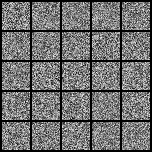

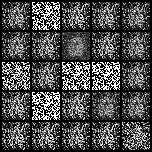

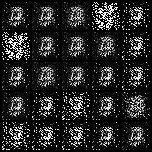

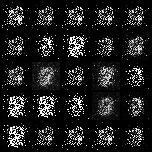

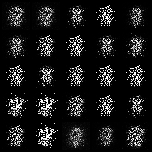

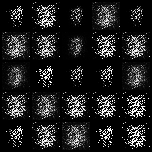

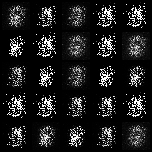

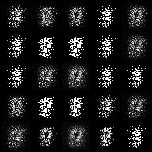

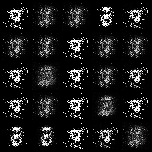

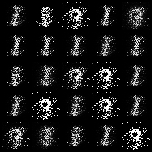

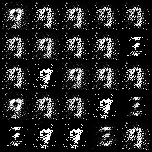

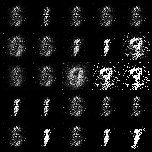

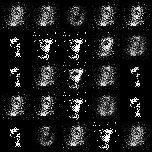

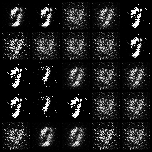

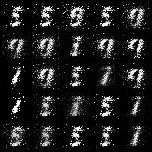

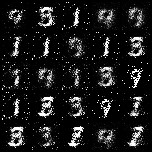

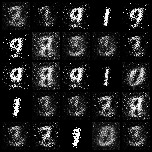

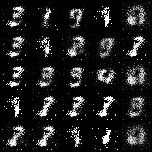

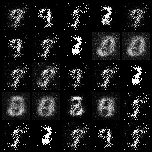

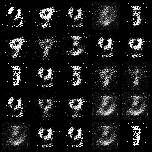

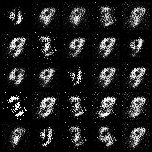

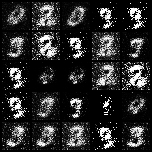

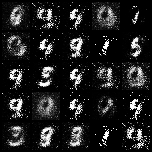

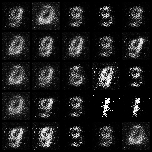

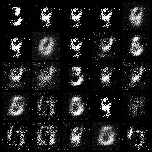

训练初期采样展示完毕


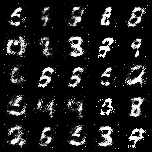

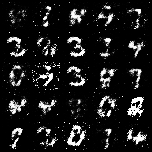

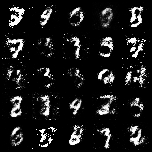

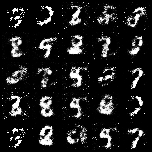

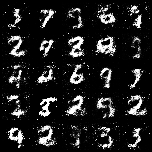

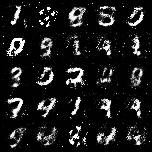

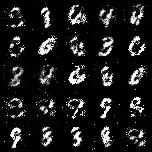

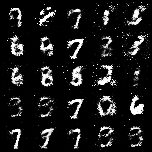

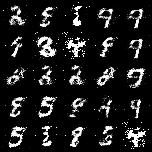

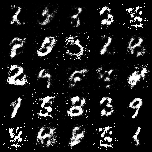

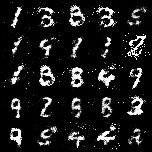

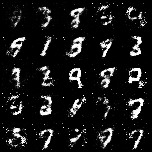

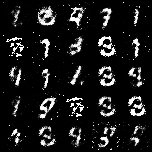

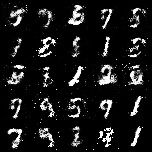

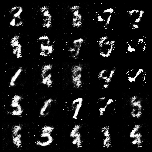

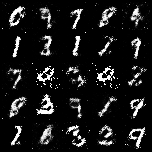

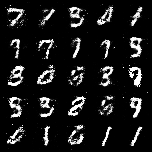

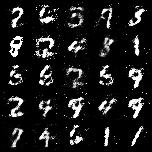

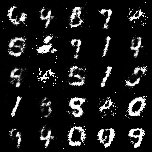

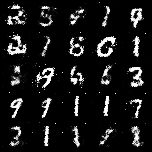

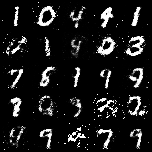

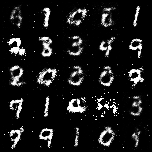

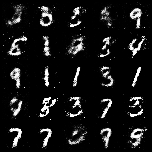

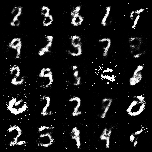

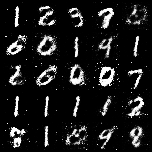

训练中期采样展示完毕


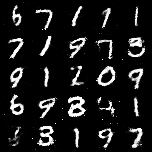

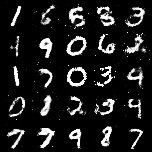

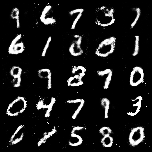

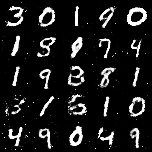

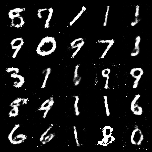

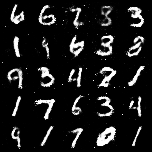

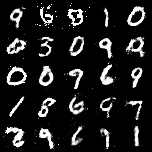

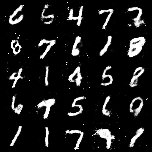

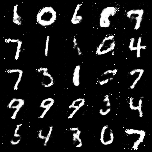

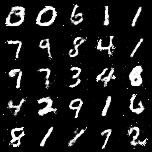

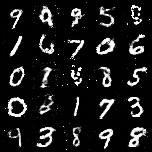

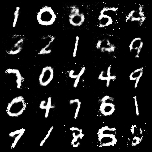

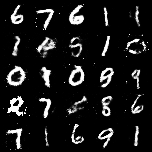

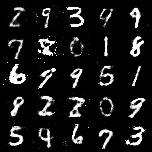

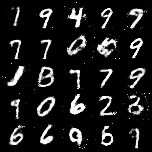

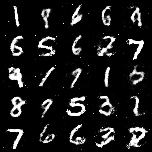

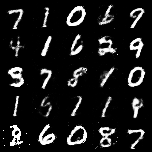

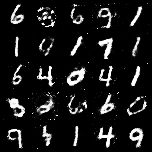

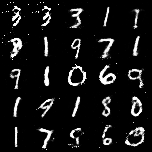

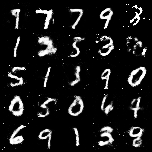

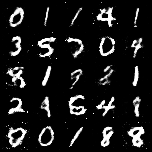

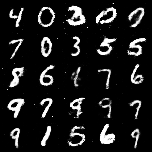

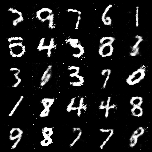

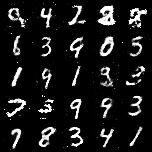

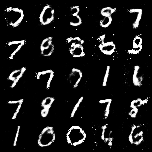

训练后期采样展示完毕


In [11]:
from IPython.display import display, Image

step = 500
max_value = 93500
total_images = (max_value // step) + 1  


start_index = 0
mid_index = total_images // 2 - 12 if total_images % 2 == 0 else total_images // 2 - 13
end_index = total_images - 25


start_image_ids = [i for i in range(start_index * step, (start_index + 25) * step, step)]

mid_image_ids = [i for i in range(mid_index * step, (mid_index + 25) * step, step)]

end_image_ids = [i for i in range(end_index * step, max_value + step, step)]


for image_id in start_image_ids:
    display(Image(filename=f'./images/task2.1/{image_id}.png'))

print("训练初期采样展示完毕")


for image_id in mid_image_ids:
    display(Image(filename=f'./images/task2.1/{image_id}.png'))

print("训练中期采样展示完毕")


for image_id in end_image_ids:
    display(Image(filename=f'./images/task2.1/{image_id}.png'))

print("训练后期采样展示完毕")

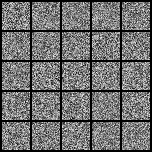

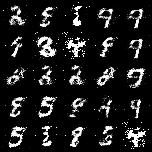

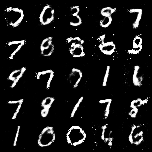

In [8]:
from IPython.display import display, Image

image_ids = [0, 45000, 93500]
for image_id in image_ids:        
    display(Image(filename=f'./images/task2.1/{image_id}.png'))

## Part 3

Show latest image steps


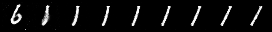

In [20]:
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
import torch
from torchvision.utils import save_image
from test import Generator

IMAGE_OUT_PATH = './task3/temp1'

generator = Generator(100).to(DEVICE)
generator.load_state_dict(torch.load("mnist_generator.pt"))
generator.eval()

noise_begin = torch.randn(size=(1, 100), device=DEVICE)
noise_end = torch.randn(size=(1, 100), device=DEVICE)

noises_interp = []
steps = 9
for i in range(steps):
    alpha = i / (steps - 1)
    noise = noise_begin * (1 - alpha) + noise_end * alpha
    noises_interp.append(noise)
    
noises_tensor = torch.stack(noises_interp).squeeze()


for i in range(steps):
    img_data = generator(noises_tensor[i].view(1, 100))
    img_gen = img_data.view(1, 28, 28)
    save_image(img_gen, f'{IMAGE_OUT_PATH}step_{i}.png', normalize=True, value_range=(-1, 1))

img_data = generator(noises_tensor)
img_gen = img_data.view(img_data.shape[0], 1, 28, 28)
save_image(img_gen, f'{IMAGE_OUT_PATH}whole_latest.png', nrow=steps, normalize=True, value_range=(-1, 1))

from IPython.display import display, Image

print(f'Show latest image steps')
display(Image(filename=f'{IMAGE_OUT_PATH}whole_latest.png'))